In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import mlflow
import mlflow.sklearn
from mlflow.models import infer_signature
import dagshub

Load Data

In [13]:
# Initialize Dagshub for MLflow tracking
dagshub.init(repo_owner='konstantine25b', repo_name='Machine_learning', mlflow=True)
mlflow.set_experiment("House Prices Experiment - assignment 1") 

Initialized MLflow to track repo "konstantine25b/Machine_learning"

Repository konstantine25b/Machine_learning initialized!

<Experiment: artifact_location='mlflow-artifacts:/4f6e0f8251c84151a7039a3a4cf1bf26', creation_time=1744015407628, experiment_id='0', last_update_time=1744015407628, lifecycle_stage='active', name='House Prices Experiment - assignment 1', tags={}>

In [14]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', None)        
pd.set_option('display.expand_frame_repr', False)
df_train = pd.read_csv('../house-prices/train.csv')
df_test = pd.read_csv('../house-prices/test.csv')

In [15]:
df_train.head


<bound method NDFrame.head of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
0        1          60       RL         65.0     8450   Pave   NaN   

In [16]:
df_train.isna().mean()

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
Length: 81, dtype: float64

In [17]:
%pip install seaborn 


[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
y_original = df_train['SalePrice']
X_original = df_train.drop('SalePrice', axis=1)
X_train, X_val, y_train, y_val = train_test_split(X_original, y_original, test_size=0.2, random_state=42)


In [22]:
print(f"Training data size: X_train - {X_train.shape}, y_train - {y_train.shape}")
print(f"Validation data size: X_val - {X_val.shape}, y_val - {y_val.shape}")


Training data size: X_train - (1168, 80), y_train - (1168,)
Validation data size: X_val - (292, 80), y_val - (292,)


Data Graphs

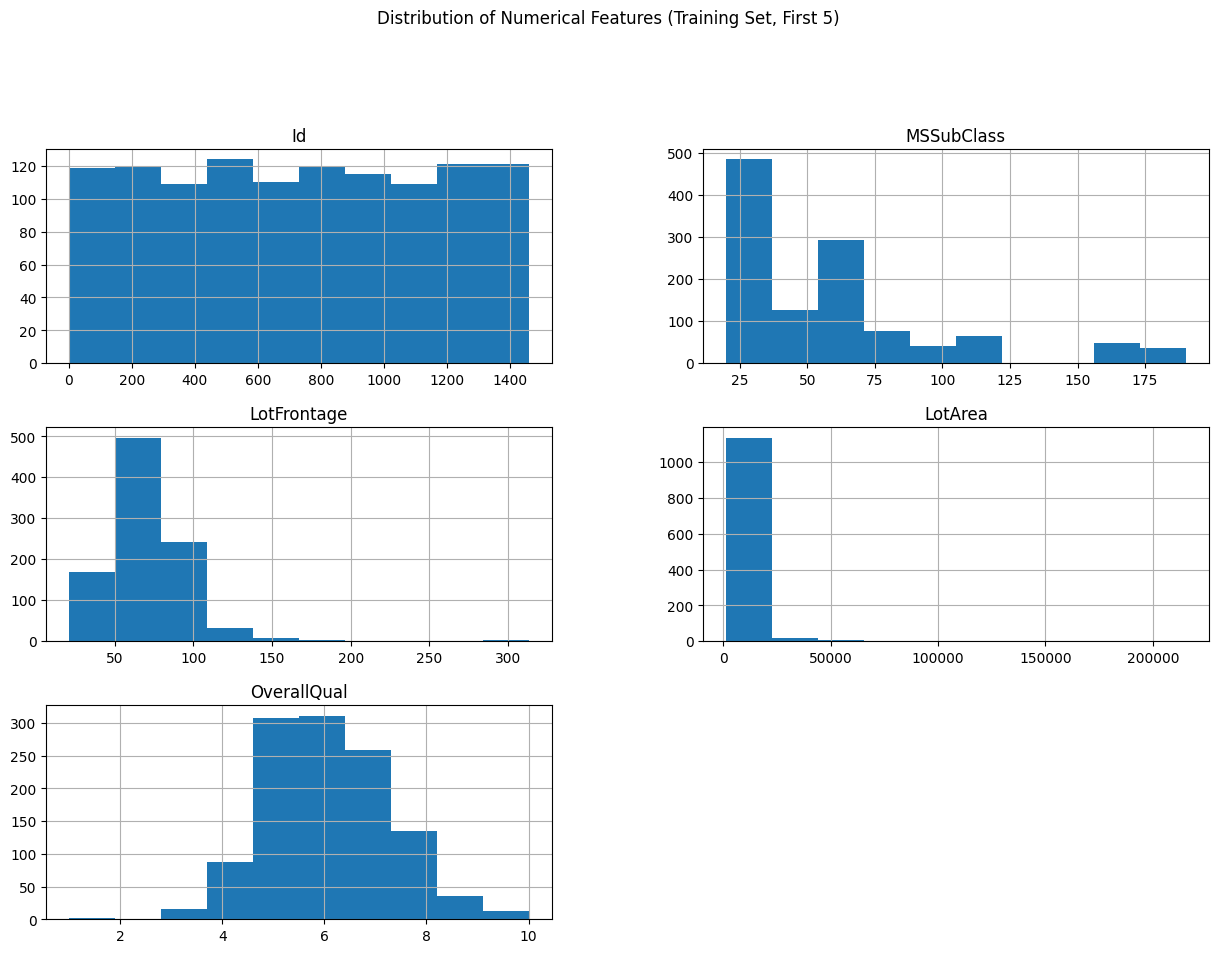

In [23]:
# #### Distribution of Numerical Features (e.g., first 5)
X_train_numerical = X_train.select_dtypes(exclude=['object'])
if not X_train_numerical.empty:
    X_train_numerical.iloc[:, :min(5, X_train_numerical.shape[1])].hist(figsize=(15, 10))
    plt.suptitle("Distribution of Numerical Features (Training Set, First 5)", y=1.02)
    plt.show()

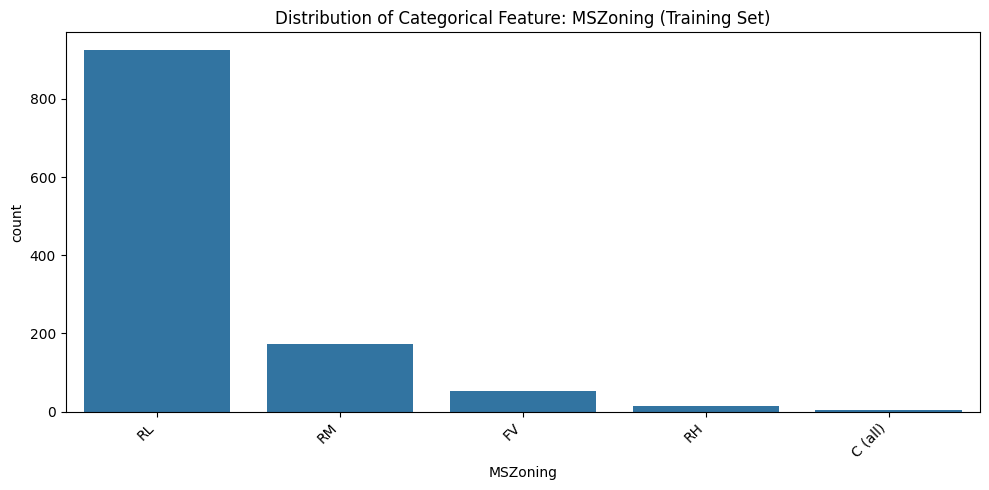

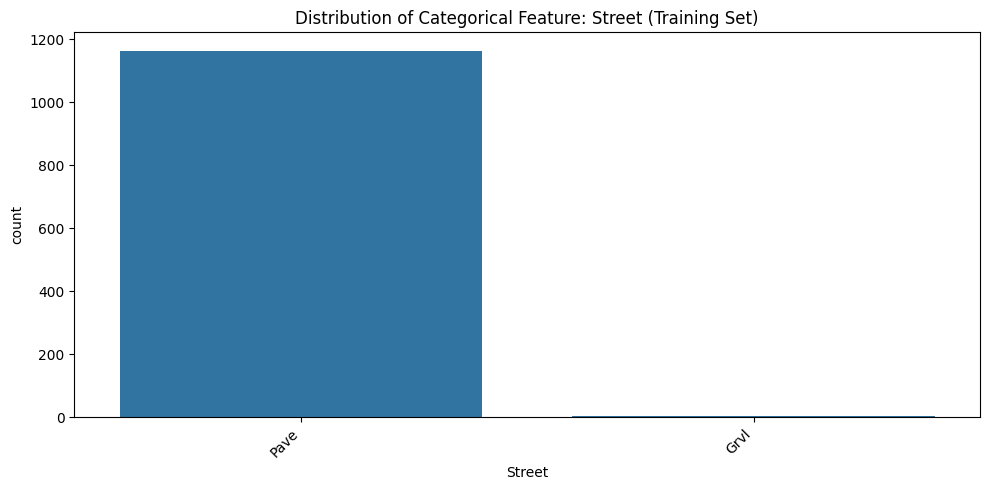

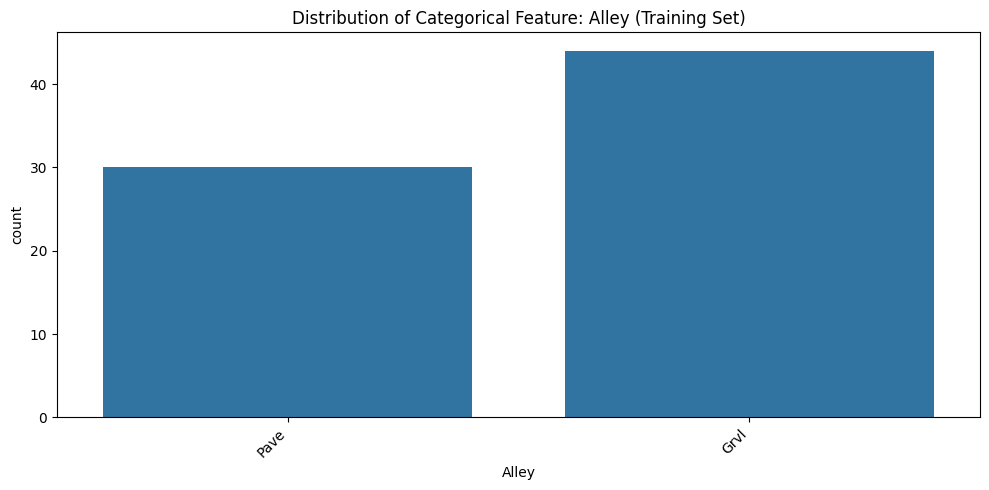

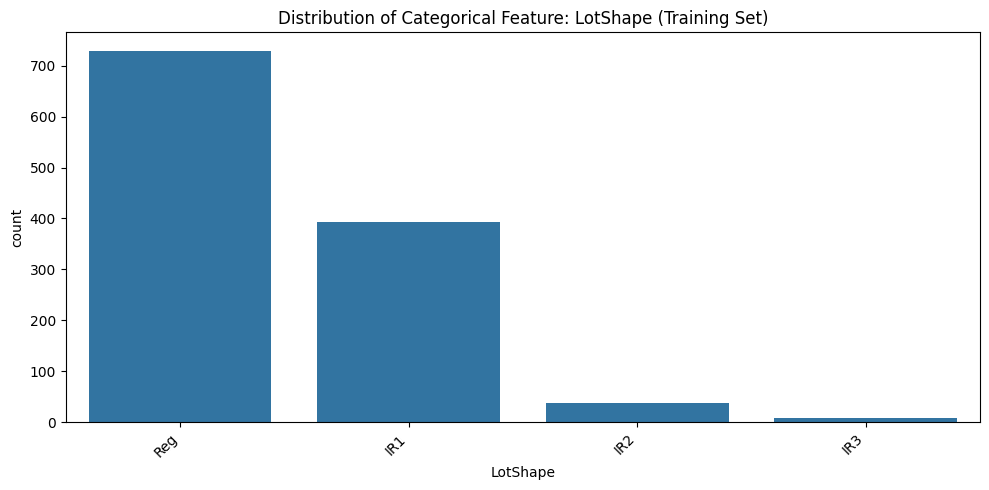

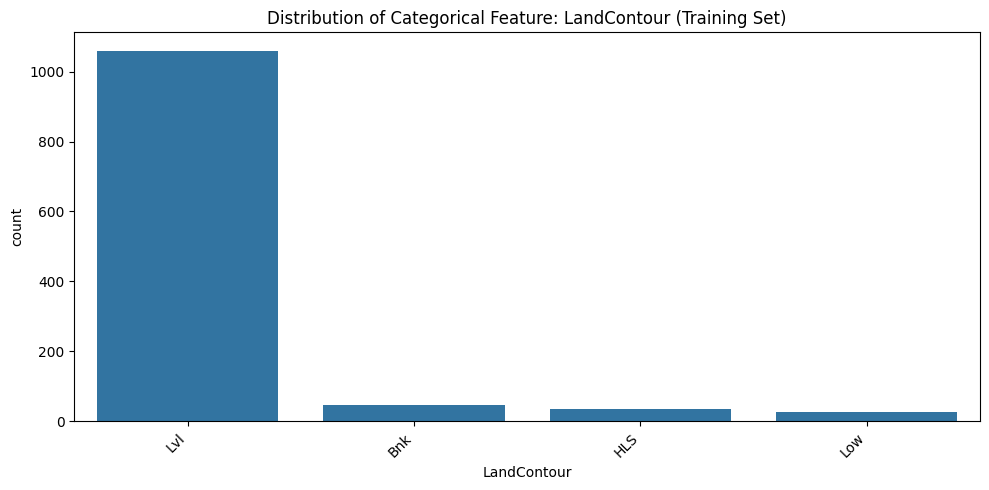

In [24]:
# #### Count of Categorical Features (e.g., first 5)
X_train_categorical = X_train.select_dtypes(include=['object'])
if not X_train_categorical.empty:
    for i, col in enumerate(X_train_categorical.columns[:min(5, len(X_train_categorical.columns))]):
        plt.figure(figsize=(10, 5))
        sns.countplot(data=X_train_categorical, x=col)
        plt.title(f"Distribution of Categorical Feature: {col} (Training Set)")
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

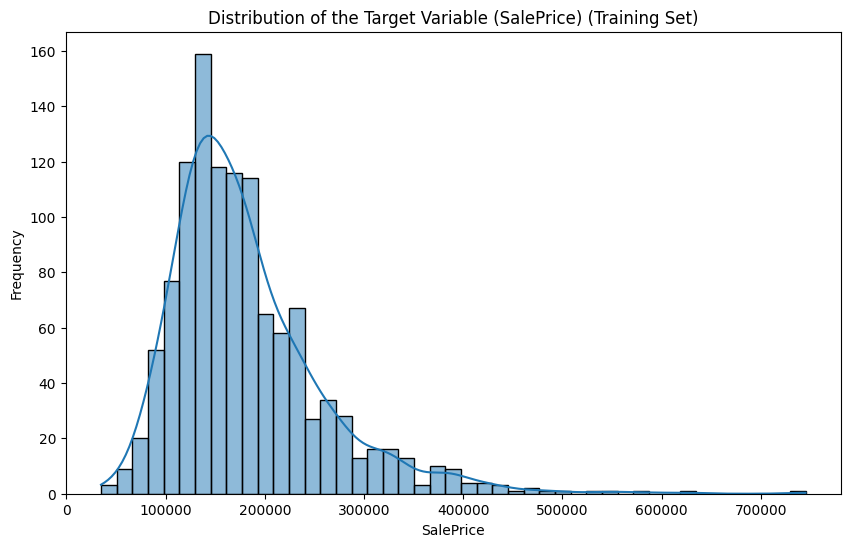

In [25]:
# #### Distribution of the Target Variable (SalePrice)
plt.figure(figsize=(10, 6))
sns.histplot(y_train, kde=True)
plt.title("Distribution of the Target Variable (SalePrice) (Training Set)")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()

# Data Cleaning
